In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
dir(pd)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p17',
 '_np_version_under1p18',
 '_testing'

In [3]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        5         0     0.0       1.0       0.0    50.0  34.940
1        3         1     1.0       0.0       0.0    18.0   0.891
2       66         1     0.0       1.0       0.0     5.0   0.330
3       70         0     0.0       1.0       1.0    31.0   0.037
4       96         1     0.0       1.0       0.0    30.0   0.038

In [4]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [5]:
claimants

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0            0     0.0       1.0       0.0    50.0  34.940
1            1     1.0       0.0       0.0    18.0   0.891
2            1     0.0       1.0       0.0     5.0   0.330
3            0     0.0       1.0       1.0    31.0   0.037
4            1     0.0       1.0       0.0    30.0   0.038
...        ...     ...       ...       ...     ...     ...
1335         1     0.0       1.0       0.0     NaN   0.576
1336         0     1.0       1.0       0.0    46.0   3.705
1337         1     1.0       1.0       0.0    39.0   0.099
1338         0     1.0       0.0       0.0     8.0   3.177
1339         1     1.0       1.0       0.0    30.0   0.688

[1340 rows x 6 columns]

In [6]:
#Shape of the data set
claimants.shape

(1340, 6)

In [7]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [8]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [9]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [10]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [11]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [12]:
y_pred_df

actual  predicted_prob
0          0               0
1          1               1
2          1               1
3          0               0
4          1               1
...      ...             ...
1334       1               1
1336       0               0
1337       1               1
1338       0               0
1339       1               1

[1096 rows x 2 columns]

In [13]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [14]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [15]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [16]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

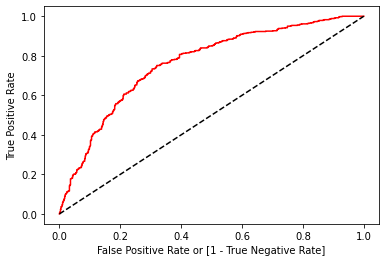

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [18]:
auc

0.7108589063606365

In [19]:
classifier.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [20]:
from pickle import dump

In [21]:
dump(classifier, open('classifier.sav','wb'))